De data wordt ingelezen en bekeken op missende waarden.

In [1]:
import pandas as pd

data = pd.read_csv('data/competition-train.csv')
data

,Individu-ID,geslacht,leeftijd,opleidingsniveau,cigaretten_per_dag,slaapscore,hypertensie,hartinfarct,diabetes,nierziekte,cholesterol,bovendruk,onderdruk,BMI,hartslag,glucose,prognose10jaar
0,#203910,V,39,1,30,62,-,-,-,-,?,122.5,80.0,18,105,?,CHD-
1,#248527,M,60,4,0,39,-,-,-,-,250,133.0,89.5,27,90,?,CHD-
2,#302622,M,42,2,0,41,-,-,-,-,274,121.0,61.5,25,80,76,CHD-
3,#142075,M,41,1,20,68,-,-,-,-,234,103.0,71.0,21,68,82,CHD+
4,#162498,V,50,3,0,38,-,-,-,-,309,136.0,90.0,26,70,75,CHD-
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3235,#170800,V,38,1,30,71,-,-,-,-,164,113.0,68.0,25,70,75,CHD-
3236,#313110,V,32,3,15,64,-,-,-,-,199,116.0,81.0,21,75,93,CHD-
3237,#226915,V,46,3,0,18,+,-,-,-,237,196.0,120.0,31,58,60,CHD+
3238,#213677,V,58,1,0,78,-,-,-,-,205,142.5,74.5,25,85,83,CHD-


Er wordt gekeken naar het aantal features en instances in de data variabel.

In [117]:
data.shape

(3240, 17)

De + en - worden omgezet naar 0 en 1, zodat alle algoritmes met de data overweg kunnen.

In [118]:
columns_to_replace = ['hypertensie', 'hartinfarct', 'diabetes', 'nierziekte']

for column in columns_to_replace:
    data[column] = data[column].replace({'-': 0, '+': 1})

# Bekijk de gewijzigde dataset
print(data.head())

  Individu-ID geslacht  leeftijd opleidingsniveau cigaretten_per_dag  \
0     #203910        V        39                1                 30   
1     #248527        M        60                4                  0   
2     #302622        M        42                2                  0   
3     #142075        M        41                1                 20   
4     #162498        V        50                3                  0   

   slaapscore  hypertensie  hartinfarct  diabetes nierziekte cholesterol  \
0          62            0            0         0          0           ?   
1          39            0            0         0          0         250   
2          41            0            0         0          0         274   
3          68            0            0         0          0         234   
4          38            0            0         0          0         309   

   bovendruk  onderdruk BMI hartslag glucose prognose10jaar  
0      122.5       80.0  18      105       ?    

Omdat de Individu-ID niet kan worden gebruikt voor het trainen van het machine learning algorimte, wordt deze uit de data verwijderd. Ook worden de M en V en CHD+ en CHD- omgezet naar 0 en 1, zodat alle machine learning algoritmes met de data overweg kunnen.

In [119]:
data = data.drop('Individu-ID', axis=1)
print(data.dtypes)
data['geslacht'] = data['geslacht'].replace({'M': 1, 'V': 0})
data['prognose10jaar'] = data['prognose10jaar'].replace({'CHD+': 1, 'CHD-': 0})

geslacht               object
leeftijd                int64
opleidingsniveau       object
cigaretten_per_dag     object
slaapscore              int64
hypertensie             int64
hartinfarct             int64
diabetes                int64
nierziekte             object
cholesterol            object
bovendruk             float64
onderdruk             float64
BMI                    object
hartslag               object
glucose                object
prognose10jaar         object
dtype: object


Er wordt nog een keer naar de data gekeken, om te controleren of de veranderen aan de features succesvol zijn verlopen.

In [120]:
data.head()

,geslacht,leeftijd,opleidingsniveau,cigaretten_per_dag,slaapscore,hypertensie,hartinfarct,diabetes,nierziekte,cholesterol,bovendruk,onderdruk,BMI,hartslag,glucose,prognose10jaar
0,0,39,1,30,62,0,0,0,0,?,122.5,80.0,18,105,?,0
1,1,60,4,0,39,0,0,0,0,250,133.0,89.5,27,90,?,0
2,1,42,2,0,41,0,0,0,0,274,121.0,61.5,25,80,76,0
3,1,41,1,20,68,0,0,0,0,234,103.0,71.0,21,68,82,1
4,0,50,3,0,38,0,0,0,0,309,136.0,90.0,26,70,75,0


Er waren problemen met de opleidingsniveau features, waardoor de LabelEncoder is toegepast op deze feature.

In [121]:
from sklearn.preprocessing import LabelEncoder

# Maak een LabelEncoder object
label_encoder = LabelEncoder()

# Pas labelencodering toe op 'opleidingsniveau'
data['opleidingsniveau'] = label_encoder.fit_transform(data['opleidingsniveau'])

# Bekijk de gewijzigde dataset
data.head()

,geslacht,leeftijd,opleidingsniveau,cigaretten_per_dag,slaapscore,hypertensie,hartinfarct,diabetes,nierziekte,cholesterol,bovendruk,onderdruk,BMI,hartslag,glucose,prognose10jaar
0,0,39,0,30,62,0,0,0,0,?,122.5,80.0,18,105,?,0
1,1,60,3,0,39,0,0,0,0,250,133.0,89.5,27,90,?,0
2,1,42,1,0,41,0,0,0,0,274,121.0,61.5,25,80,76,0
3,1,41,0,20,68,0,0,0,0,234,103.0,71.0,21,68,82,1
4,0,50,2,0,38,0,0,0,0,309,136.0,90.0,26,70,75,0


Alle vraagtekens zijn omgezet naar NaN waarden. En de inhoud van alle features is omgezet naar nummerieke waarden.

In [122]:
import numpy as np

# Vervang '?' door NaN in de hele dataset
data.replace('?', np.nan, inplace=True)

# Converteer de gehele dataset naar numerieke waarden
data = data.apply(pd.to_numeric)

# # Bereken de gemiddelde waarde van elke kolom
# column_means = data.mean()

# # Vervang NaN-waarden door de gemiddelde waarden per kolom
# data.fillna(column_means, inplace=True)

data.head()

,geslacht,leeftijd,opleidingsniveau,cigaretten_per_dag,slaapscore,hypertensie,hartinfarct,diabetes,nierziekte,cholesterol,bovendruk,onderdruk,BMI,hartslag,glucose,prognose10jaar
0,0,39,0,30.0,62,0,0,0,0.0,NaN,122.5,80.0,18.0,105.0,NaN,0
1,1,60,3,0.0,39,0,0,0,0.0,250.0,133.0,89.5,27.0,90.0,NaN,0
2,1,42,1,0.0,41,0,0,0,0.0,274.0,121.0,61.5,25.0,80.0,76.0,0
3,1,41,0,20.0,68,0,0,0,0.0,234.0,103.0,71.0,21.0,68.0,82.0,1
4,0,50,2,0.0,38,0,0,0,0.0,309.0,136.0,90.0,26.0,70.0,75.0,0


Er wordt gekeken naar hoeveel NaN's in elke feature voorkomen.

In [123]:
missing_values = data.isna().sum()

pd.DataFrame({
    "isna": missing_values
}).T

,geslacht,leeftijd,opleidingsniveau,cigaretten_per_dag,slaapscore,hypertensie,hartinfarct,diabetes,nierziekte,cholesterol,bovendruk,onderdruk,BMI,hartslag,glucose,prognose10jaar
isna,0,0,0,21,0,0,0,0,8,42,0,0,13,1,301,0


Er wordt gekeken naar instances 0, 1, 2 of 3 missende waarden bevatten.

In [124]:
missing = data.isna().sum(axis=1)

pd.DataFrame({"missing": missing.value_counts().sort_index()}).T

,0,1,2,3
missing,2897,301,41,1


Alle instances die NaN's bevatten worden verwijderd, aangezien er genoeg instances worden overgehouden.

In [125]:
data = data.loc[missing < 1, :]

data.shape

(2897, 16)

Er wordt nog een keer naar de inhoud van de data gekeken na de veranderingen.

In [126]:
print(data.describe())

          geslacht     leeftijd  opleidingsniveau  cigaretten_per_dag  \
count  2897.000000  2897.000000       2897.000000         2897.000000   
mean      0.440801    49.601312          1.048326            8.987573   
std       0.496569     8.813650          1.113583           11.997519   
min       0.000000    29.000000          0.000000            0.000000   
25%       0.000000    42.000000          0.000000            0.000000   
50%       0.000000    49.000000          1.000000            0.000000   
75%       1.000000    57.000000          2.000000           20.000000   
max       1.000000    71.000000          4.000000           70.000000   

        slaapscore  hypertensie  hartinfarct     diabetes   nierziekte  \
count  2897.000000  2897.000000  2897.000000  2897.000000  2897.000000   
mean     55.381084     0.311011     0.006559     0.025889     0.034518   
std      18.067565     0.462987     0.080733     0.158831     0.182588   
min       4.000000     0.000000     0.000000  

Er wordt met de volgende plot naar de verdeling van prognose10jaar gekeken. 

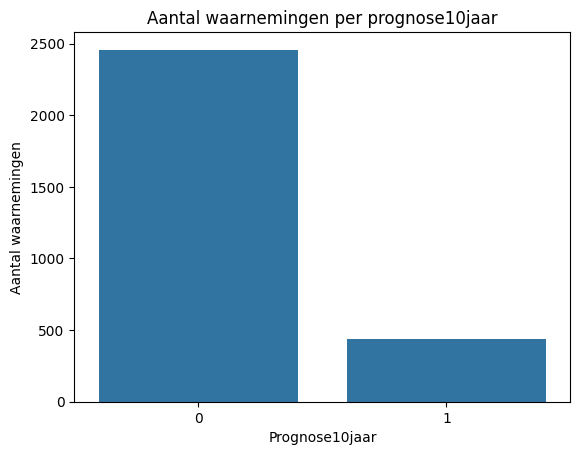

In [127]:
import seaborn as sns
import matplotlib.pyplot as plt

# Krijg de tellingen van '1' en '0' in de kolom 'prognose10jaar'
counts = data['prognose10jaar'].value_counts()

# Maak een barplot
sns.barplot(x=counts.index, y=counts.values)

# Stel de titel en labels in
plt.title('Aantal waarnemingen per prognose10jaar')
plt.xlabel('Prognose10jaar')
plt.ylabel('Aantal waarnemingen')

# Toon de plot
plt.show()

De 0 groep lijkt duidelijk groter te zijn dan de 1 groep.

Er wordt met de ANOVA test gekeken naar welke features de meeste informatie opleveren voor de prognose10jaar feature.

In [128]:
# Get the number of unique groups (categories) in the 'stroke' column
Ngroups = data["prognose10jaar"].nunique()

# Get the total number of observations in the dataset
Ntotal = len(data.index)

from scipy import stats

# Define a function to compute ANOVA statistics for a given attribute
def anova_stats(attribute):
    # Create a list of lists containing the attribute values for each group (stroke category)
    groupdata = [data[attribute].tolist() for _, data in data.groupby("prognose10jaar")]
    
    # Perform one-way ANOVA test
    F, p = stats.f_oneway(*groupdata)
    
    # Calculate the effect size (η^2)
    η2 = F * (Ngroups-1) / (F * (Ngroups-1) + Ntotal - Ngroups)
    
    return F, p, η2

# Apply the ANOVA function to each numerical attribute in the dataset
anova = {attribute: anova_stats(attribute) for attribute in data.select_dtypes(include='number').columns}

# Create a DataFrame to display ANOVA statistics
pd.DataFrame(anova, index=["$F$", "$p$", "$\eta^2$"]).T


c:\Users\gielb\AppData\Local\Programs\Python\Python310\lib\site-packages\scipy\stats\_stats_py.py:3906: ConstantInputWarning: Each of the input arrays is constant;the F statistic is not defined or infinite
  warnings.warn(stats.ConstantInputWarning(msg))


,$F$,$p$,$\eta^2$
geslacht,22.214967,2.552819e-06,0.007615
leeftijd,163.172658,2.162325e-36,0.053356
opleidingsniveau,8.948762,2.800001e-03,0.003082
cigaretten_per_dag,5.206851,2.257032e-02,0.001795
slaapscore,293.287463,1.058291e-62,0.091989
hypertensie,110.169267,2.547663e-25,0.036660
hartinfarct,15.446913,8.684159e-05,0.005307
diabetes,22.841147,1.847362e-06,0.007828
nierziekte,1.168013,2.799000e-01,0.000403
cholesterol,32.145608,1.571427e-08,0.010982


In [135]:
data

,geslacht,leeftijd,opleidingsniveau,cigaretten_per_dag,slaapscore,hypertensie,hartinfarct,diabetes,nierziekte,cholesterol,bovendruk,onderdruk,BMI,hartslag,glucose,prognose10jaar,PC-1,PC-2,PC-3,PC-4
2,1,42,1,0.0,41,0,0,0,0.0,274.0,121.0,61.5,25.0,80.0,76.0,0,-1.407956,0.314511,-0.039997,0.379685
3,1,41,0,20.0,68,0,0,0,0.0,234.0,103.0,71.0,21.0,68.0,82.0,1,-2.258752,0.109338,1.042498,0.415665
4,0,50,2,0.0,38,0,0,0,0.0,309.0,136.0,90.0,26.0,70.0,75.0,0,0.384755,-0.138898,-1.256505,0.291874
5,1,54,0,20.0,54,1,0,0,0.0,214.0,147.0,74.0,24.0,96.0,87.0,0,0.871842,-0.179935,1.239956,-0.575795
7,0,37,1,0.0,37,0,0,0,0.0,242.0,110.0,75.0,16.0,58.0,68.0,0,-2.382383,0.050273,-1.269052,0.527229
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3235,0,38,0,30.0,71,0,0,0,0.0,164.0,113.0,68.0,25.0,70.0,75.0,0,-2.339759,-0.175643,0.695527,-0.522729
3236,0,32,2,15.0,64,0,0,0,0.0,199.0,116.0,81.0,21.0,75.0,93.0,0,-1.939902,0.236929,0.333389,-1.371962
3237,0,46,2,0.0,18,1,0,0,0.0,237.0,196.0,120.0,31.0,58.0,60.0,1,3.689675,-1.812102,-0.176914,0.838762
3238,0,58,0,0.0,78,0,0,0,0.0,205.0,142.5,74.5,25.0,85.0,83.0,0,-0.085525,0.255370,-1.379952,-0.586300


Omdat de PCA voor de test dataset niet kan worden uitgevoerd op de prognose10jaar feature, wordt deze verwijderd voor het scalen.

In [130]:
from sklearn.preprocessing import StandardScaler

temp_data = data.drop('prognose10jaar', axis=1)
# Create an instance of StandardScaler and use it to scale numerical features in the 'stroke' dataset
scaled = StandardScaler().fit_transform(data.select_dtypes(include='number'))


Er wordt gekeken naar de mean en std van de scaled features.

In [131]:
import numpy as np

# Create a DataFrame to display mean and standard deviation for each feature after scaling
statistics_df = pd.DataFrame({
    'mean': np.mean(scaled, axis=0),
    'std': np.std(scaled, axis=0)
}, index=data.columns[0:15])
statistics_df

,mean,std
geslacht,-1.532928e-18,1.0
leeftijd,-2.955485e-16,1.0
opleidingsniveau,-3.433758e-17,1.0
cigaretten_per_dag,-6.990151e-17,1.0
slaapscore,1.054654e-16,1.0
hypertensie,5.641175e-17,1.0
hartinfarct,-3.801661e-17,1.0
diabetes,-4.046930e-17,1.0
nierziekte,1.226342e-18,1.0
cholesterol,7.603322e-17,1.0


Er wordt een PCA uitgevoerd op de scaled data (zonder de prognose10jaar feature). Hierbij worden PC-1 t/m PC-4 gevormd.

In [132]:
from sklearn.decomposition import PCA

# Fit PCA on the scaled data
pca = PCA().fit(scaled)

# Transform the scaled data using PCA
components = pca.transform(scaled)

# Iterate over the first 4 principal components
for n in range(4):
    # Create attribute names for the principal components
    attribute = f"PC-{n+1}"
    
    # Add new columns to the 'stroke' DataFrame with the principal component values
    data[attribute] = components[:, n]
    
    # Perform ANOVA on the newly added principal component
    anova[attribute] = anova_stats(attribute)

Er wordt naar de statistiek van de PC features gekeken voor de prognose10jaar feature.

In [133]:
pd.DataFrame(anova, index=["$F$", "$p$", "$\eta^2$"]).T

,$F$,$p$,$\eta^2$
geslacht,22.214967,2.552819e-06,0.007615
leeftijd,163.172658,2.162325e-36,0.053356
opleidingsniveau,8.948762,2.800001e-03,0.003082
cigaretten_per_dag,5.206851,2.257032e-02,0.001795
slaapscore,293.287463,1.058291e-62,0.091989
hypertensie,110.169267,2.547663e-25,0.036660
hartinfarct,15.446913,8.684159e-05,0.005307
diabetes,22.841147,1.847362e-06,0.007828
nierziekte,1.168013,2.799000e-01,0.000403
cholesterol,32.145608,1.571427e-08,0.010982


Er wordt gekeken naar hoe groot deel van de data kan worden verklaard met bepaalde PC features.

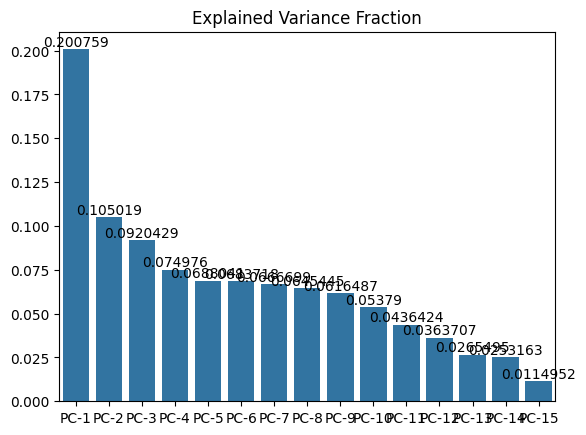

In [134]:
# Create a bar plot to visualize the explained variance ratio for each principal component
axs = sns.barplot(x=[f"PC-{n+1}" for n in range(15)], y=pca.explained_variance_ratio_)

# Add labels to the bars showing the explained variance ratio
axs.bar_label(axs.containers[0])

axs.set_title("Explained Variance Fraction")

plt.show()

Er wordt gekeken naar hoe goed de PC-1 en PC-2 features de prognose10jaar groepen kunnen onderscheiden.

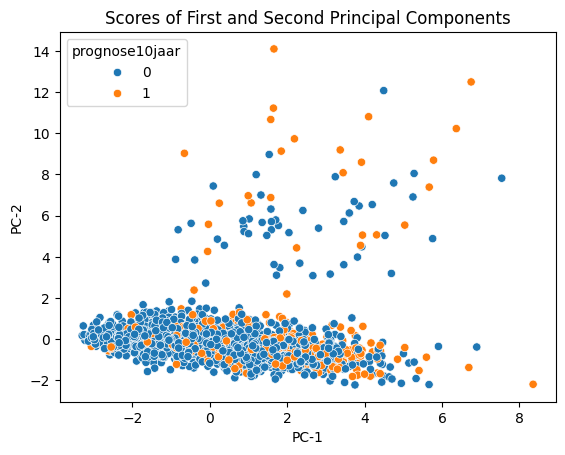

In [89]:
axs = sns.scatterplot(data=data, x="PC-1", y="PC-2", hue="prognose10jaar")

axs.set_title("Scores of First and Second Principal Components")

plt.show()

Er worden eern aantal standaard machine learning algoritmes (ook gebruikt voor onze eigen projecten) ingeladen.

In [90]:
from sklearn.dummy import DummyClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.linear_model import RidgeClassifier
from sklearn.model_selection import cross_validate
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from imblearn.over_sampling import SMOTE
from sklearn.metrics import accuracy_score, classification_report
from sklearn.impute import SimpleImputer
import seaborn as sns
from sklearn.metrics import confusion_matrix
from sklearn.metrics import roc_curve, roc_auc_score
from sklearn.model_selection import GridSearchCV


models = [
    DummyClassifier,
    DecisionTreeClassifier,
    LinearDiscriminantAnalysis,
    GaussianNB,
    KNeighborsClassifier,
    RandomForestClassifier,
    AdaBoostClassifier,
    MLPClassifier,
    LogisticRegression,
    SVC,
    RidgeClassifier
]


In de X variabel zitten alle features behalve de prognose10jaar (voor trainen) en in de y feature zit alleen de prognose10jaar features (gebruikt als uitkomst).

In [92]:
X = data.drop('prognose10jaar', axis=1).to_numpy()  # Verwijder de 'stroke' kolom om de kenmerken te krijgen
y = data['prognose10jaar'].to_numpy() 

Er wordt gekeken naar welk machine learning model het beste scoort voor het testen wanneer de basissettigns worden gebruikt.

In [93]:
metric_scores = {}
for model in models:
    scores = cross_validate(model(), X, y, cv=2, return_train_score=True)
    for key, val in scores.items():
        scores[key] = val.mean()
    metric_scores[f"{model.__name__}"] = scores
    
pd.DataFrame(metric_scores).T

c:\Users\gielb\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\ensemble\_weight_boosting.py:519: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
c:\Users\gielb\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\ensemble\_weight_boosting.py:519: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
c:\Users\gielb\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-le

,fit_time,score_time,test_score,train_score
DummyClassifier,0.000000,0.001660,0.848119,0.848119
DecisionTreeClassifier,0.023316,0.000000,0.801176,1.000000
LinearDiscriminantAnalysis,0.012010,0.004544,0.865378,0.868138
GaussianNB,0.000000,0.000000,0.827404,0.832930
KNeighborsClassifier,0.000000,0.140245,0.845358,0.876423
RandomForestClassifier,0.347671,0.018101,0.864341,1.000000
AdaBoostClassifier,0.181990,0.014181,0.857437,0.888504
MLPClassifier,0.600215,0.000000,0.862617,0.872278
LogisticRegression,0.048084,0.000000,0.861925,0.868483
SVC,0.022903,0.064902,0.849155,0.850534


In [99]:
kolommen = list(data.columns)
kolommen.remove('prognose10jaar')
print(kolommen)

['geslacht', 'leeftijd', 'opleidingsniveau', 'cigaretten_per_dag', 'slaapscore', 'hypertensie', 'hartinfarct', 'diabetes', 'nierziekte', 'cholesterol', 'bovendruk', 'onderdruk', 'BMI', 'hartslag', 'glucose', 'PC-1', 'PC-2', 'PC-3', 'PC-4']


Er wordt gekeken naar welke features het meest zeggend zijn voor de prognose10jaar feature met de SelectKBest optie van sklearn.

In [100]:
from sklearn.feature_selection import SelectKBest
selector = SelectKBest(k=22).fit(X, y)

pd.DataFrame({"Attribute": kolommen, "Score": selector.scores_}).sort_values("Score", ascending=False).set_index("Attribute")

c:\Users\gielb\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:776: UserWarning: k=22 is greater than n_features=19. All the features will be returned.
  warnings.warn(


,Score
Attribute,
slaapscore,293.287463
PC-1,211.264864
leeftijd,163.172658
bovendruk,145.640756
hypertensie,110.169267
PC-4,74.308942
onderdruk,71.103909
glucose,49.768460
cholesterol,32.145608


Er wordt getest of er met SMOTE (wegens de ongelijke verdeling van de data) een hogere test-score kan worden behaald.

In [101]:

# Scheiding van features en target variabele
X = data.drop('prognose10jaar', axis=1)
y = data['prognose10jaar']

# Train-test splitsing
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Oversampling van de trainingsdata met SMOTE met aangepaste k_neighbors
smote = SMOTE(sampling_strategy=1, k_neighbors=6, random_state=42)
X_train_smote, y_train_smote = smote.fit_resample(X_train, y_train)



# Rest van je code blijft hetzelfde...

# Model training
model = RandomForestClassifier(random_state=42)
model.fit(X_train_smote, y_train_smote)

# Voorspellingen op de testset
y_pred = model.predict(X_test)

# Evaluatie van het model
accuracy = accuracy_score(y_test, y_pred)
print("Test accuracy:", accuracy)
print("\nClassification Report:")
print(classification_report(y_test, y_pred))


Test accuracy: 0.7982758620689655

Classification Report:
              precision    recall  f1-score   support

           0       0.89      0.87      0.88       485
           1       0.39      0.43      0.41        95

    accuracy                           0.80       580
   macro avg       0.64      0.65      0.65       580
weighted avg       0.81      0.80      0.80       580



Helaas geeft SMOTE voor de RandomForestClassifier een lagere test score.

Er wordt gekeken naar welke hyperparameters zorgen voor de hoogste test accuracy voor de RandomForestClassifier.

In [103]:
# Definieer de hyperparameters grid
param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [None, 10, 20],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

# Grid search cross-validation
grid_search = GridSearchCV(RandomForestClassifier(random_state=42), param_grid, cv=5, scoring='accuracy')
grid_search.fit(X_train_smote, y_train_smote)

# Best parameters found
best_params = grid_search.best_params_
print("Best parameters:", best_params)

# Retrain model with best parameters
best_model = grid_search.best_estimator_
best_model.fit(X_train_smote, y_train_smote)

# Predictions and evaluation
y_pred = best_model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print("Test accuracy with best parameters:", accuracy)
print("\nClassification Report:")
print(classification_report(y_test, y_pred))

Best parameters: {'max_depth': None, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 300}
Test accuracy with best parameters: 0.8068965517241379

Classification Report:
              precision    recall  f1-score   support

           0       0.89      0.88      0.88       485
           1       0.42      0.44      0.43        95

    accuracy                           0.81       580
   macro avg       0.65      0.66      0.66       580
weighted avg       0.81      0.81      0.81       580



Er wordt gekeken in welke mate de 2 meest zeggende features voor de prognose10jaar feature, in staat zijn om de groepen van de prognose10jaar feature te onderscheiden.

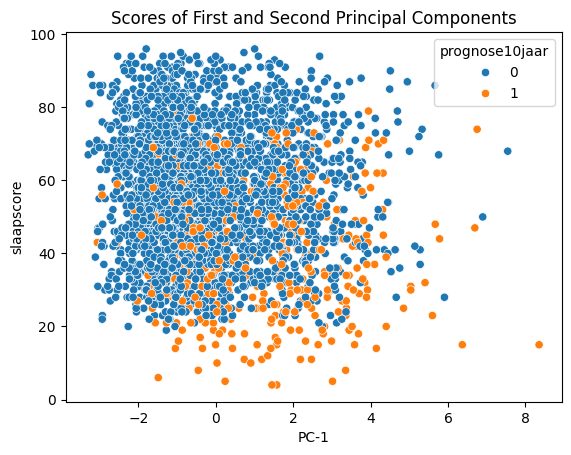

In [104]:
axs = sns.scatterplot(data=data, x="PC-1", y="slaapscore", hue="prognose10jaar")

axs.set_title("Scores of First and Second Principal Components")

plt.show()

Er wordt gekeken naar welke hyperparameters zorgen voor de hoogste test accuracy voor de LinearDiscriminantAnalysis.

In [111]:
param_grid=dict()
param_grid['solver']=['svd', 'lsqr', 'eigen']
param_grid['n_components']=[None, 10, 20, 30, 40, 1000]

# Grid search cross-validation
grid_search = GridSearchCV(LinearDiscriminantAnalysis(), param_grid, cv=5, scoring='accuracy')
grid_search.fit(X_train, y_train)

# Best parameters found
best_params = grid_search.best_params_
print("Best parameters:", best_params)

# Retrain model with best parameters
best_model = grid_search.best_estimator_
best_model.fit(X_train, y_train)

# Predictions and evaluation
y_pred = best_model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print("Test accuracy with best parameters:", accuracy)
print("\nClassification Report:")
print(classification_report(y_test, y_pred))

Best parameters: {'n_components': None, 'solver': 'svd'}
Test accuracy with best parameters: 0.8637931034482759

Classification Report:
              precision    recall  f1-score   support

           0       0.87      0.98      0.92       485
           1       0.72      0.27      0.40        95

    accuracy                           0.86       580
   macro avg       0.80      0.63      0.66       580
weighted avg       0.85      0.86      0.84       580



c:\Users\gielb\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\model_selection\_validation.py:542: FitFailedWarning: 
80 fits failed out of a total of 90.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
1 fits failed with the following error:
Traceback (most recent call last):
  File "c:\Users\gielb\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\model_selection\_validation.py", line 890, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "c:\Users\gielb\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\base.py", line 1351, in wrapper
    return fit_method(estimator, *args, **kwargs)
  File "c:\Users\gielb\AppData\Local\Programs\Python\Python310\lib\site-packages

Dit model lijkt met de bovenstaande hyperparameters de hoogste test accuracy score te behalen.

Het model wordt als een pickle file opgeslagen, zodat het kan worden gebruikt voor het uitvoeren van voorspellingen.

In [115]:
import pickle
ideale_model = LinearDiscriminantAnalysis(n_components=None, solver='svd')
ideale_model.fit(X, y)

with open('./model.pkl', 'wb') as filehandle:
    pickle.dump(ideale_model, filehandle)

Er wordt een confusionmatix gemaakt om te kijken naar het voorspellende vermogen van het 'beste' machine learning algoritme.

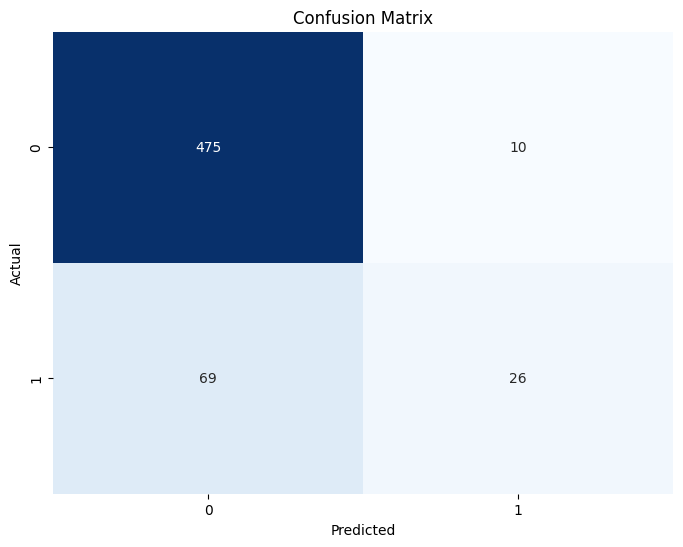

In [112]:
# Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
 
# Plotting Confusion Matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

Er wordt getest of de LinearDiscriminant feature een hogere test score behaald door SMOTE te gebruiken.

In [113]:
param_grid=dict()
param_grid['solver']=['svd', 'lsqr', 'eigen']
param_grid['n_components']=[None, 10, 20, 30, 40, 1000]

# Grid search cross-validation
grid_search = GridSearchCV(LinearDiscriminantAnalysis(), param_grid, cv=5, scoring='accuracy')
grid_search.fit(X_train_smote, y_train_smote)

# Best parameters found
best_params = grid_search.best_params_
print("Best parameters:", best_params)

# Retrain model with best parameters
best_model = grid_search.best_estimator_
best_model.fit(X_train_smote, y_train_smote)

# Predictions and evaluation
y_pred = best_model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print("Test accuracy with best parameters:", accuracy)
print("\nClassification Report:")
print(classification_report(y_test, y_pred))

Best parameters: {'n_components': None, 'solver': 'svd'}
Test accuracy with best parameters: 0.7965517241379311

Classification Report:
              precision    recall  f1-score   support

           0       0.91      0.84      0.87       485
           1       0.41      0.58      0.48        95

    accuracy                           0.80       580
   macro avg       0.66      0.71      0.68       580
weighted avg       0.83      0.80      0.81       580



c:\Users\gielb\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\model_selection\_validation.py:542: FitFailedWarning: 
75 fits failed out of a total of 90.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
75 fits failed with the following error:
Traceback (most recent call last):
  File "c:\Users\gielb\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\model_selection\_validation.py", line 890, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "c:\Users\gielb\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\base.py", line 1351, in wrapper
    return fit_method(estimator, *args, **kwargs)
  File "c:\Users\gielb\AppData\Local\Programs\Python\Python310\lib\site-package

De test score gaat niet omhoog bij het gebruik van SMOTE, waardoor ervoor wordt gekozen om geen SMOTE te gebruiken.